# Importing Required Libaries:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow
import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Activation,Flatten
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,accuracy_score

# Data Description:

In [4]:
path=r"/content/drive/MyDrive/DeepLearningProjects/Brain Tumour detection using MRI images/Final Datasets/train"
print(len(os.listdir(path)))
print(os.listdir(path))

5
['Degenerative disease', 'Inflammatory Disease', 'Neoplastic Disease', 'Normal brain', 'cerebrovascular brain']


# Data Preprocessing & Data Transformation:

In [5]:
training_data=ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,rotation_range=20)
validation_data=ImageDataGenerator(rescale=1/255)
testing_data=ImageDataGenerator(rescale=1/255)

In [6]:
train_data=training_data.flow_from_directory(r"/content/drive/MyDrive/DeepLearningProjects/Brain Tumour detection using MRI images/Final Datasets/train",target_size=(224,224),color_mode="rgb",batch_size=16,class_mode="categorical")
valid_data=validation_data.flow_from_directory(r"/content/drive/MyDrive/DeepLearningProjects/Brain Tumour detection using MRI images/Final Datasets/val",target_size=(224,224),color_mode="rgb",batch_size=16,class_mode="categorical")
test_data=testing_data.flow_from_directory(r"/content/drive/MyDrive/DeepLearningProjects/Brain Tumour detection using MRI images/Final Datasets/test",target_size=(224,224),color_mode="rgb",batch_size=16,class_mode="categorical")

Found 2789 images belonging to 5 classes.
Found 346 images belonging to 5 classes.
Found 354 images belonging to 5 classes.


# Model Architecture:

In [7]:
model=Sequential()
# Input Layer
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(2,2),padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
# Hidden layer_01
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
# Hidden Layer-02
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
# Hidden Layer-03
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(100,activation="relu"))

# Output Layer:
model.add(Dense(5,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [8]:
opt=Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

# Model Training:

In [9]:
history=model.fit(train_data,validation_data=valid_data,epochs=100,batch_size=8)

Epoch 1/100
175/175 [==============================] - 1145s 6s/step - loss: 1.5293 - accuracy: 0.3188 - val_loss: 1.5006 - val_accuracy: 0.3266
Epoch 2/100
175/175 [==============================] - 40s 227ms/step - loss: 1.5054 - accuracy: 0.3292 - val_loss: 1.4900 - val_accuracy: 0.3266
Epoch 3/100
175/175 [==============================] - 42s 239ms/step - loss: 1.4856 - accuracy: 0.3335 - val_loss: 1.4552 - val_accuracy: 0.3555
Epoch 4/100
175/175 [==============================] - 40s 231ms/step - loss: 1.4393 - accuracy: 0.3582 - val_loss: 1.4127 - val_accuracy: 0.3844
Epoch 5/100
175/175 [==============================] - 40s 231ms/step - loss: 1.3847 - accuracy: 0.4023 - val_loss: 1.2986 - val_accuracy: 0.4653
Epoch 6/100
175/175 [==============================] - 41s 234ms/step - loss: 1.3041 - accuracy: 0.4450 - val_loss: 1.2291 - val_accuracy: 0.5029
Epoch 7/100
175/175 [==============================] - 41s 233ms/step - loss: 1.2300 - accuracy: 0.4937 - val_loss: 1.1984 - 

# Evaluation Metrics:

In [10]:
accuracy_score=model.evaluate(train_data)
accuracy_score
print("Training accuracy for CNN model: ",accuracy_score[1]*100)
print("Training loss for CNN Model:",accuracy_score[0])

175/175 [==============================] - 39s 220ms/step - loss: 0.2999 - accuracy: 0.8810
Training accuracy for CNN model:  88.09609413146973
Training loss for CNN Model: 0.29990604519844055


In [11]:
accuracy_score=model.evaluate(test_data)
accuracy_score
print("Testing accuracy for CNN model:",accuracy_score[1]*100)
print("Testing loss for  CNN model:",accuracy_score[0])

23/23 [==============================] - 135s 6s/step - loss: 0.3771 - accuracy: 0.8955
Testing accuracy for CNN model: 89.5480215549469
Testing loss for  CNN model: 0.37714773416519165


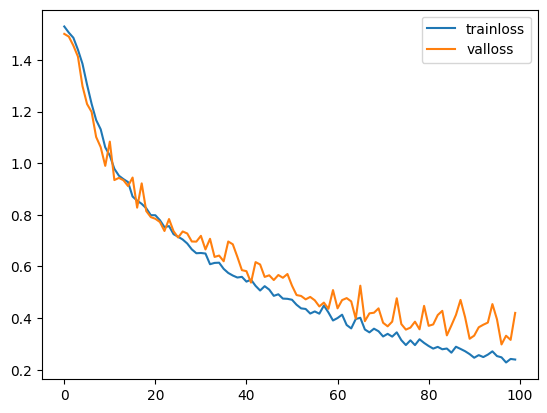

In [12]:
plt.plot(history.history["loss"],label="trainloss")
plt.plot(history.history["val_loss"],label="valloss")
plt.legend()
plt.show()

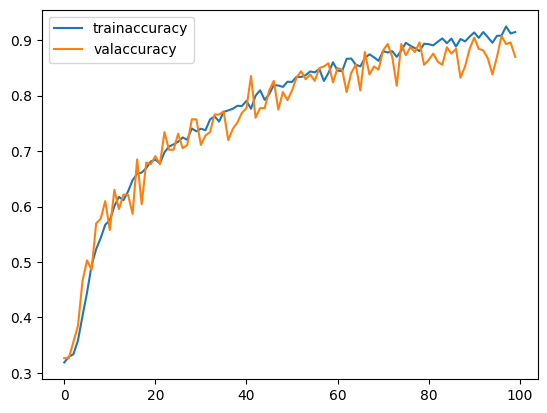

In [13]:
plt.plot(history.history["accuracy"],label='trainaccuracy')
plt.plot(history.history['val_accuracy'],label='valaccuracy')
plt.legend()
plt.show()

In [14]:
model.save(r"/content/drive/MyDrive/DeepLearningProjects/Brain Tumour detection using MRI images/Final Datasets/models/CNN.h5")

In [15]:
loaded_model=load_model(r"/content/drive/MyDrive/DeepLearningProjects/Brain Tumour detection using MRI images/Final Datasets/models/CNN.h5")

In [16]:
y_prediction=loaded_model.predict(test_data)

23/23 [==============================] - 1s 48ms/step


In [17]:
y_pred=np.argmax(y_prediction,axis=1)

In [18]:
cm=confusion_matrix(test_data.classes,y_pred)
cm

array([[19, 19, 15, 10, 19],
       [18, 14,  9,  6, 22],
       [17, 13,  7,  6, 15],
       [ 6,  7,  5,  3,  9],
       [34, 23, 19,  9, 30]])

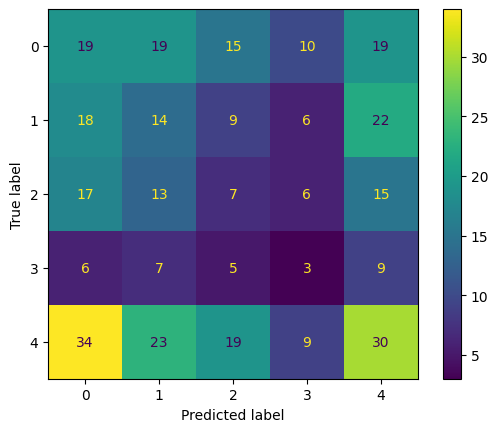

In [19]:
cm_display=ConfusionMatrixDisplay(cm)
cm_display.plot()

In [20]:
from skimage.io import imread
from skimage import transform

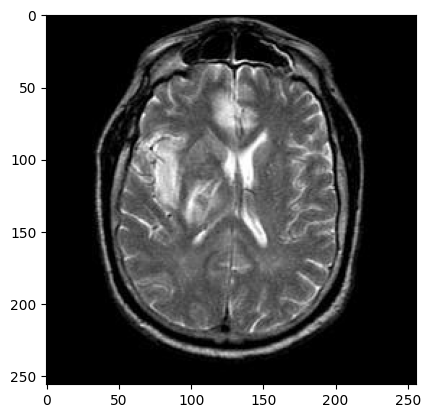

In [24]:
I_test=imread(r"/content/drive/MyDrive/DeepLearningProjects/Brain Tumour detection using MRI images/Final Datasets/test/Inflammatory Disease/Inflammatory Disease (101).JPG")
plt.imshow(I_test)

In [25]:
I_test=np.array(I_test).astype("float32")/255
I_test=transform.resize(I_test,(224,224,3))
I_test=np.expand_dims(I_test,axis=0)
I_test.shape

(1, 224, 224, 3)

# Prediction:

In [26]:
result=loaded_model.predict(I_test)
result=np.argmax(result)
print(result)

1/1 [==============================] - 0s 18ms/step
1
